In [21]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\taoji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taoji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
url = 'https://newsapi.org/v2/everything?'
api_key = "c31d9f572e5d47eeaae9d16463d0c921"

In [8]:
# for downloading the lexicon
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\taoji\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taoji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def get_articles(file):
    '''
    This is a helper function the extract articles from the newsapi dataset
    ''' 


    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        article_results.append(article_dict)
    return article_results

def get_news_articles(source: str, topic: str):
    '''
    Returns the dataframe from newsource and topic
    Input: str,str
    Output: pd frame
    '''

    assert isinstance(source,str)
    assert isinstance(topic,str)

    
    parameters_headlines = {
    'q': topic,
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'domains' : format(source)  
    }

    # making the API call 
    response_headline = requests.get(url, params = parameters_headlines)
    response_json_headline = response_headline.json()
    responses = response_json_headline["articles"]
    # transforminf the data from JSON dictionary to a pandas data frame
    news_articles_df = pd.DataFrame(get_articles(responses))
    # printing the head to check the format and the working of the get_articles function
    return news_articles_df

In [10]:
def source_getter(df):
    source = []
    for source_dict in df['source']:
        source.append(source_dict['name'])
    df['source'] = source #append the source to the df

In [11]:
cnn_covidf = get_news_articles("cnn.com","covid")     #cnn covid frame
fox_covidf = get_news_articles("foxnews.com","covid") #fox covid frame
source_getter(cnn_covidf)
source_getter(fox_covidf)
cnn_covidf['pub_date'] = pd.to_datetime(cnn_covidf['pub_date']).apply(lambda x: x.date())
fox_covidf['pub_date'] = pd.to_datetime(fox_covidf['pub_date']).apply(lambda x: x.date())

In [12]:
cnn_covidf['pub_date'].head()

0    2021-11-09
1    2021-11-04
2    2021-10-19
3    2021-11-05
4    2021-11-18
Name: pub_date, dtype: object

In [13]:
cnn_covidf.dropna(inplace=True)
cnn_covidf = cnn_covidf[~cnn_covidf['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(cnn_covidf.isnull().sum())
print(cnn_covidf.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(95, 8)


In [14]:
fox_covidf.dropna(inplace=True)
fox_covidf = fox_covidf[~fox_covidf['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(fox_covidf.isnull().sum())
print(fox_covidf.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(99, 8)


In [15]:
cnn_covidf['combined_text'] = cnn_covidf['title'].map(str) +" "+ cnn_covidf['content'].map(str) 
fox_covidf['combined_text'] = fox_covidf['title'].map(str) +" "+ fox_covidf['content'].map(str) 
cnn_covidf.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text
1,Indian homegrown Covid-19 shot wins WHO emerge...,Story by Reuters,CNN,The World Health Organization (WHO) said on We...,The World Health Organization (WHO) said on We...,2021-11-04,https://www.cnn.com/2021/11/03/asia/india-cova...,https://cdn.cnn.com/cnnnext/dam/assets/2111032...,Indian homegrown Covid-19 shot wins WHO emerge...
3,"Even if they get breakthrough infections, vacc...","Maggie Fox, CNN",CNN,"Even if they get a breakthrough infection, vac...",(CNN)Even if they get a breakthrough infection...,2021-11-05,https://www.cnn.com/2021/11/04/health/vaccines...,https://cdn.cnn.com/cnnnext/dam/assets/2111042...,"Even if they get breakthrough infections, vacc..."
4,How to prepare for another winter of Covid-19?...,"Katia Hetter, CNN",CNN,CNN Medical Analyst Dr. Leana Wen shares what ...,(CNN)Winter is almost here. After weeks of ste...,2021-11-18,https://www.cnn.com/2021/11/18/health/winter-c...,https://cdn.cnn.com/cnnnext/dam/assets/2111171...,How to prepare for another winter of Covid-19?...
6,Fired Washington State head football coach to ...,"Wayne Sterling, CNN",CNN,Former Washington State Cougars football coach...,(CNN)Former Washington State Cougars football ...,2021-10-20,https://www.cnn.com/2021/10/20/sport/rolovich-...,https://cdn.cnn.com/cnnnext/dam/assets/2110182...,Fired Washington State head football coach to ...
7,Biden administration plans to announce purchas...,"Kaitlan Collins, CNN",CNN,The Biden administration plans to purchase 10 ...,(CNN)The Biden administration plans to purchas...,2021-11-16,https://www.cnn.com/2021/11/16/politics/pfizer...,https://cdn.cnn.com/cnnnext/dam/assets/2111051...,Biden administration plans to announce purchas...


In [16]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [17]:
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [18]:
cnn_covidf['combined_text'] = cnn_covidf['combined_text'].map(clean_text)
cnn_covidf['tokens'] = cnn_covidf['combined_text'].map(tokenize)
cnn_covidf['tokens'] = cnn_covidf['tokens'].map(remove_stopwords)
cnn_covidf['lems'] =cnn_covidf['tokens'].map(lemmatize)

In [19]:
fox_covidf['combined_text'] = fox_covidf['combined_text'].map(clean_text)
fox_covidf['tokens'] = fox_covidf['combined_text'].map(tokenize)
fox_covidf['tokens'] = fox_covidf['tokens'].map(remove_stopwords)
fox_covidf['lems'] =fox_covidf['tokens'].map(lemmatize)

In [25]:
cnn_covidf['keywords'] = ""
for index,row in cnn_covidf.iterrows():
    comb_text = row['combined_text']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    row['keywords'] = list(key_words_dict.keys())
    
cnn_covidf['keywords'] = cnn_covidf['keywords'].map(remove_stopwords)
cnn_covidf['lems'] =cnn_covidf['keywords'].map(lemmatize)
cnn_covidf.head()

In [27]:
def get_senti_frame(frame = None, download = False):

    '''
    Returns a dataframe with sentiment scores extracted using nltk vader
    Input: pd frame, bool
    Output: pd frame
    '''
    
    assert isinstance(download,bool)

    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    if(download):nltk.download('vader_lexicon')
    sia = SIA()
    results = []
    titles = frame["lems"]

    for line in titles:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)
    
    df = pd.DataFrame.from_records(results)
    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1
    df.loc[df['compound'] < -0.2, 'label'] = -1
    df['word_count'] = df['headline'].apply(lambda x: len(str(x).split()))
    return df

In [28]:
cnn_sframe = get_senti_frame(cnn_covidf,False)
fox_sframe = get_senti_frame(fox_covidf,False)

Here we show the processed sentiment dataframe, where 0 represents neutral, -1 represents negative, and 1 represents postive. Sentiment were calculated based on the headlines of the news

In [29]:
cnn_sframe.head()

,neg,neu,pos,compound,headline,label,word_count
0,0.083,0.635,0.283,0.7430,indian homegrown covid shot win emergency use ...,1,24
1,0.130,0.787,0.083,-0.2960,even get breakthrough infection vaccinated peo...,-1,22
2,0.000,1.000,0.000,0.0000,prepare another winter covid expert weight cnn...,0,20
3,0.382,0.579,0.039,-0.9186,fired state head football coach file lawsuit u...,-1,28
4,0.000,1.000,0.000,0.0000,biden administration plan announce purchase pf...,0,19


Next, we show some samples of the postively labeled  ande negative sentiment headlines

In [30]:
positive_cnn = cnn_sframe[cnn_sframe["label"] == 1]["headline"]
print(positive_cnn.iloc[0])
print(positive_cnn.iloc[2])
print(positive_cnn.iloc[5])

indian homegrown covid shot win emergency use approval world health organization said wednesday granted drugmaker bharat biotech home grown vaccine listing paving way char
uk authorizes merck ridgeback biotherapeutics antiviral pill treat covid cnn medicine healthcare product regulatory agency said thursday authorized oral molnupiravir mild moderate char
u set join small club nation vaccinating young child weekly edition cnn coronavirus newsletter look roundup every wednesday subscribed yet sign decision closely watched parent char


In [31]:
positive_cnn = cnn_sframe[cnn_sframe["label"] == -1]["headline"]
print(positive_cnn.iloc[0])
print(positive_cnn.iloc[2])
print(positive_cnn.iloc[5])

even get breakthrough infection vaccinated people sick covid study show cnn infection two different team researcher reported thursday vaccine strongly prote char
get covid vaccine appointment child cnn health official u issued emergency use authorization younger child next step vaccinating family finding nearest dose char
new york grand jury indicts robert durst murder charge cnn notorious subject hbo docuseries jinx convicted murderer indicted monday westchester county separate char


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df,title:str):
    '''
      Given a sentiment frame, plot the sentiment
    '''
  
    assert isinstance(title,str)

    fig, ax = plt.subplots(figsize=(8, 8))

    counts = df.label.value_counts(normalize=True) * 100

    sns.barplot(x=counts.index, y=counts, ax=ax)

    ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
    ax.set_ylabel("Percentage")
    ax.set_title(title)
    plt.show()

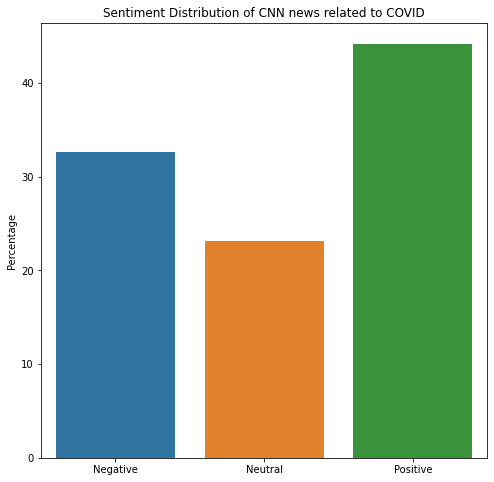

In [34]:
plot(cnn_sframe,"Sentiment Distribution of CNN news related to COVID")

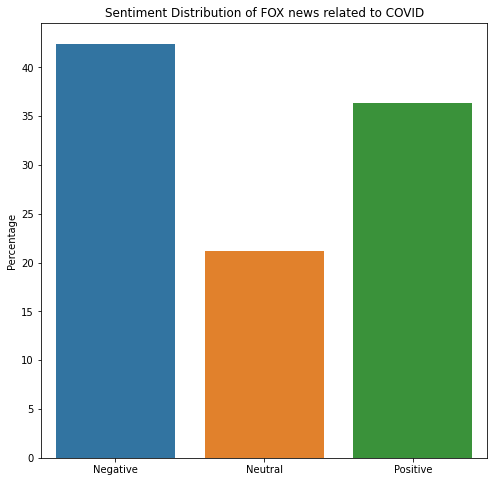

In [35]:
plot(fox_sframe,"Sentiment Distribution of FOX news related to COVID")

In [14]:
def get_word_freq(sframe,label,topk = 20,download = False):
    '''
    Returns the top words in the headlines given the label{1(pos), -1(negative)}
    Input: data frame,data frame, int, int, bool
          sframe: sentiment frame, df: news dataframe
    Output: list of dict 
    '''

    assert isinstance(label,int)
    assert isinstance(download,bool)

    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize, RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    if download: nltk.download('stopwords')

    stop_words = stopwords.words('english')
    tokens = []


    pos_lines = list(sframe[sframe.label == label].headline)

    for line in pos_lines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    pos_freq = nltk.FreqDist(tokens)
    return pos_freq.most_common(topk) if topk is not None else pos_freq.most_common()

    

In [15]:
cnn_pos = get_word_freq(cnn_sframe,label = 1, topk = None)
print(cnn_pos[:20])
cnn_neg = get_word_freq(cnn_sframe,label = -1, topk = None)
print(cnn_neg[:20])

[('chars', 33), ('cnn', 28), ('covid', 9), ('19', 9), ('new', 8), ('people', 6), ('2021', 5), ('wednesday', 5), ('vaccinated', 5), ('year', 5), ('york', 4), ('united', 4), ('health', 4), ('president', 4), ('pandemic', 4), ('november', 3), ('world', 3), ('vaccine', 3), ('get', 3), ('state', 3)]
[('chars', 21), ('cnn', 20), ('covid', 7), ('19', 7), ('new', 6), ('york', 4), ('pandemic', 4), ('monday', 3), ('people', 3), ('trial', 3), ('late', 3), ('according', 3), ('business', 3), ('charges', 3), ('former', 2), ('state', 2), ('university', 2), ('following', 2), ('officials', 2), ('vaccine', 2)]


In [16]:
fox_pos = get_word_freq(fox_sframe,label = 1, topk = None)
print(cnn_pos[:20])
fox_neg = get_word_freq(fox_sframe,label = -1, topk = None)
print(cnn_neg[:20])

[('chars', 33), ('cnn', 28), ('covid', 9), ('19', 9), ('new', 8), ('people', 6), ('2021', 5), ('wednesday', 5), ('vaccinated', 5), ('year', 5), ('york', 4), ('united', 4), ('health', 4), ('president', 4), ('pandemic', 4), ('november', 3), ('world', 3), ('vaccine', 3), ('get', 3), ('state', 3)]
[('chars', 21), ('cnn', 20), ('covid', 7), ('19', 7), ('new', 6), ('york', 4), ('pandemic', 4), ('monday', 3), ('people', 3), ('trial', 3), ('late', 3), ('according', 3), ('business', 3), ('charges', 3), ('former', 2), ('state', 2), ('university', 2), ('following', 2), ('officials', 2), ('vaccine', 2)]


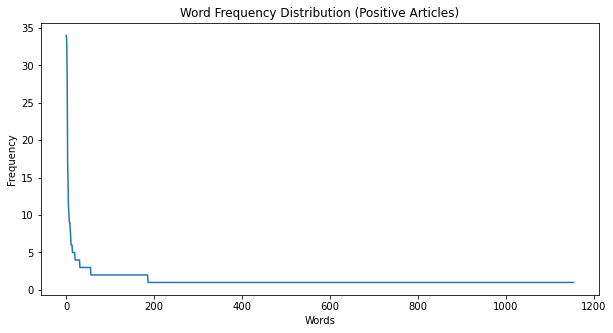

In [17]:
positive = sorted(fox_pos + cnn_pos,key = lambda i: -i[1])
y_val = [x[1] for x in positive]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive Articles)")
plt.show()

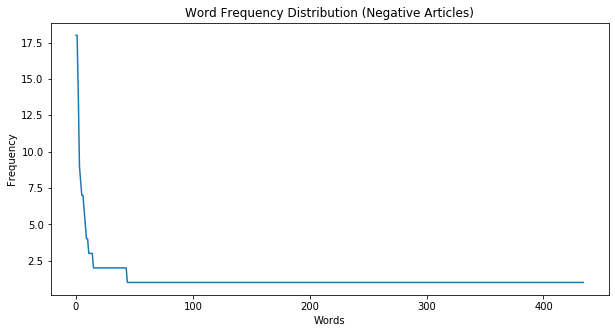

In [22]:
negative =sorted(fox_neg + cnn_neg,key = lambda i: -i[1])
y_val = [x[1] for x in negative]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative Articles)")
plt.show()